In [513]:
import pandas as pd
import numpy as np

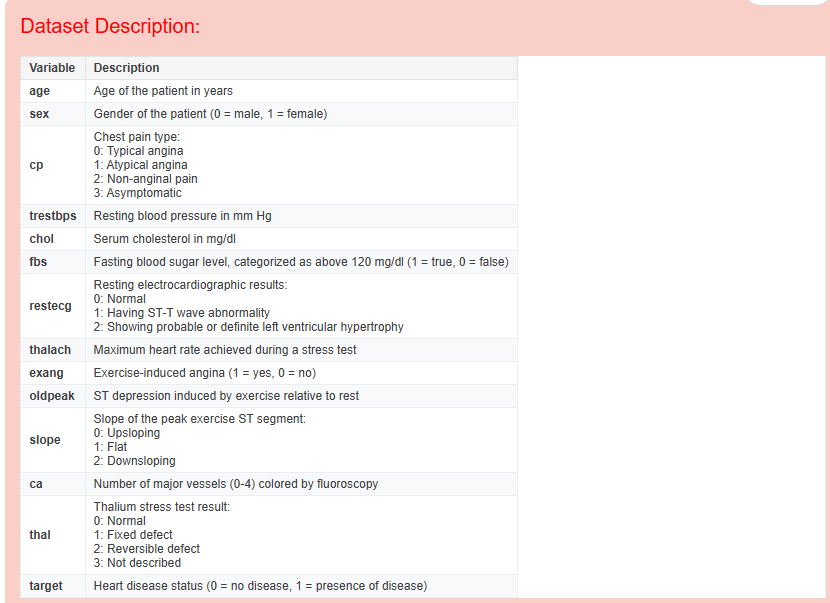

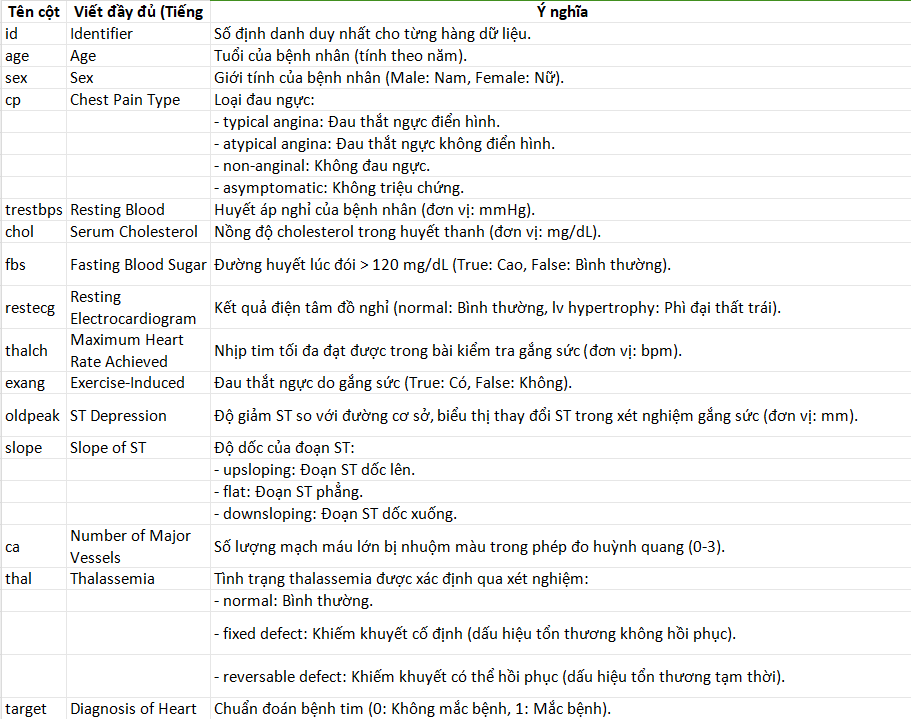

### Mô tả dữ liệu

In [514]:
df_heart = pd.read_csv('heart_disease.csv')
df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [515]:
df_heart[['ca']][df_heart[['ca']].isna().all(axis=1)]

,ca
166,NaN
192,NaN
287,NaN
302,NaN
303,NaN
...,...
915,NaN
916,NaN
917,NaN
918,NaN


In [516]:
df_heart.select_dtypes(include=('int64', 'float64')).head()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,1
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [517]:
df_heart.select_dtypes(include=('object')).head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [518]:
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [519]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [520]:
numeric_col = ['id', 'age',	'trestbps',	'chol',	'thalch',	'oldpeak',	'ca',	'target']
numeric_col


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [521]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [522]:
df_numeric = df_heart[numeric_col]
df_numeric = df_numeric.drop(columns='id')
df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,1
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,NaN,1
916,62,NaN,139.0,NaN,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,NaN,1
918,58,NaN,385.0,NaN,NaN,NaN,0


In [523]:
df_numeric[df_numeric['trestbps'] == 0]

,age,trestbps,chol,thalch,oldpeak,ca,target
753,55,0.0,0.0,155.0,1.5,NaN,1


### Numeric 

#### Kiểm tra các giá trị bằng 0
- Vì 0 đối với các chỉ số trên là 0 hợp lý điều này gây nhiễu cho bộ data trên, nên cần chuyển về Nan

In [524]:
for col in df_numeric[['trestbps', 'chol',	'thalch']]:
    # Đếm số lượng giá trị 0 trước khi thay thế
    zero_count = df_numeric[df_numeric[col] == 0].shape[0]
    
    # Thay thế giá trị 0 bằng NaN
    df_numeric[col] = df_numeric[col].replace(0, np.nan)
    
    # In thông tin
    print(f"Column: {col}, Dem_GT_0: {zero_count}")


Column: trestbps, Dem_GT_0: 1
Column: chol, Dem_GT_0: 172
Column: thalch, Dem_GT_0: 0


In [525]:
df_numeric.dtypes

age           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
ca          float64
target        int64
dtype: object

#### Numeric columns

In [526]:
import matplotlib.pyplot as plt
import seaborn as sns

In [527]:
df_numeric.isna().sum()

age           0
trestbps     60
chol        202
thalch       55
oldpeak      62
ca          611
target        0
dtype: int64

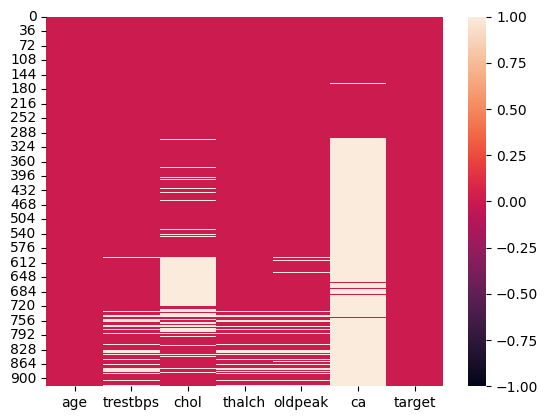

In [528]:
sns.heatmap(df_numeric.isna(), vmin=-1, vmax=1);

In [529]:
# def handle_outliers(data, columns, method='clip', threshold=1.5):
#     for col in columns:
#         if col in data.columns:
#             # Tính toán IQR
#             Q1 = data[col].quantile(0.25)
#             Q3 = data[col].quantile(0.75)
#             IQR = Q3 - Q1
#             lower_bound = Q1 - 1.5 * IQR
#             upper_bound = Q3 + 1.5 * IQR
            
#             # Xử lý theo phương pháp
#             if method == 'clip':
#                 data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)
#             elif method == 'remove':
#                 data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
#             elif method == 'replace_with_median':
#                 median_value = data[col].median()
#                 data.loc[data[col] < lower_bound, col] = median_value
#                 data.loc[data[col] > upper_bound, col] = median_value
    
#     return data

# # Áp dụng hàm xử lý outliers trên các cột số
# cleaned_data = handle_outliers(df_heart.copy(), columns=numeric_col, method='clip')

# # Kiểm tra lại dữ liệu sau khi xử lý
# cleaned_data.describe()


In [530]:
corr = df_numeric.corr()
corr

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.253042,0.083326,-0.365778,0.258243,0.370416,0.282700
trestbps,0.253042,1.000000,0.088763,-0.102427,0.171562,0.093705,0.116959
chol,0.083326,0.088763,1.000000,-0.047186,0.046960,0.127798,0.118327
thalch,-0.365778,-0.102427,-0.047186,1.000000,-0.151174,-0.264094,-0.394503
oldpeak,0.258243,0.171562,0.046960,-0.151174,1.000000,0.281817,0.385528
ca,0.370416,0.093705,0.127798,-0.264094,0.281817,1.000000,0.455599
target,0.282700,0.116959,0.118327,-0.394503,0.385528,0.455599,1.000000


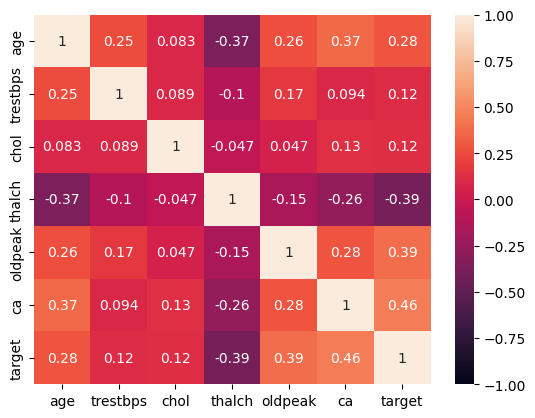

In [531]:
sns.heatmap(data=corr, annot=True,
            vmin=-1, vmax=1);

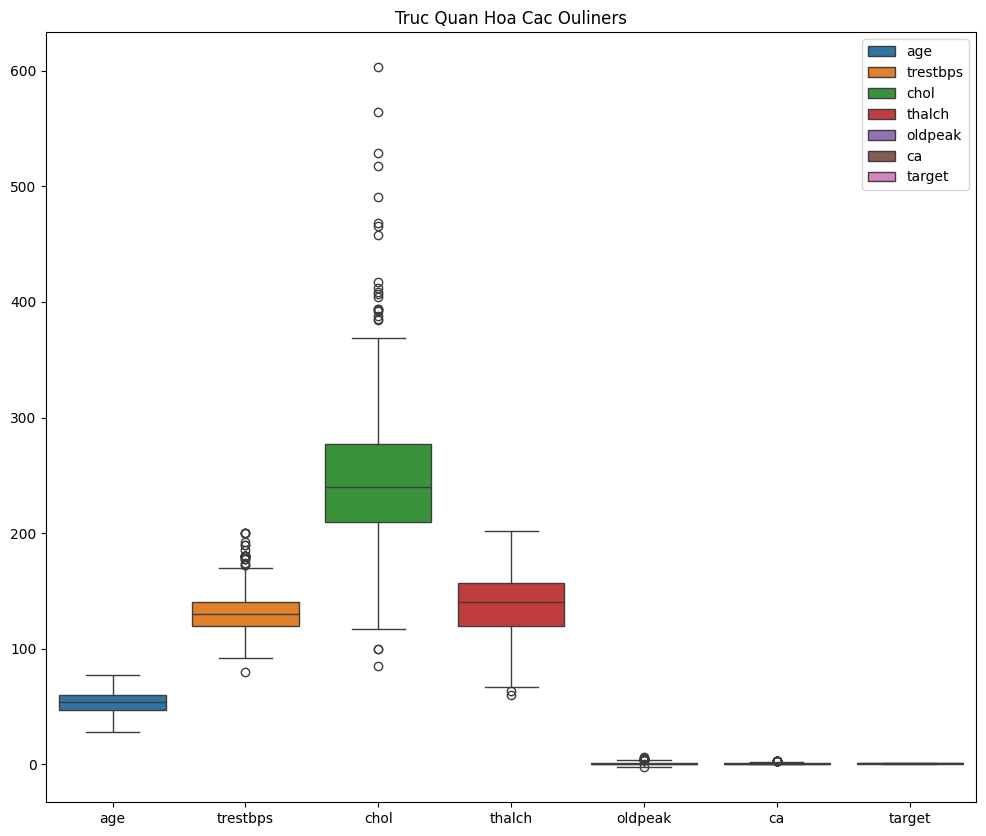

In [532]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(df_numeric, legend=True);
ax.set(title="Truc Quan Hoa Cac Ouliners");
# ax.get_xticklabels('')

In [533]:
df_numeric.describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,860.000000,718.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.286047,246.832869,137.545665,0.878788,0.676375,0.553261
std,9.424685,18.536175,58.527062,25.926276,1.091226,0.935653,0.497426
min,28.000000,80.000000,85.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,210.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,239.500000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,276.750000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [534]:
def detect_outliners_without_nan(x):
    # Bỏ qua giá trị NaN khi tính toán
    q1 = np.nanquantile(x, 0.25)
    q3 = np.nanquantile(x, 0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return x[(x<lower_bound)|(x>upper_bound)]
print(detect_outliners_without_nan(df_numeric['chol']).value_counts().sum())
print(detect_outliners_without_nan(df_numeric['trestbps']).value_counts().sum())
print(detect_outliners_without_nan(df_numeric['thalch']).value_counts().sum())
print(detect_outliners_without_nan(df_numeric['oldpeak']).value_counts().sum())
print(detect_outliners_without_nan(df_numeric['ca']).value_counts().sum())

23
27
2
16
20


In [535]:
outliers_dict = {}
for col in df_numeric.columns:
    outliers_dict[col] = detect_outliners_without_nan(df_numeric[col]).value_counts().sum()
outliers_dict


{'age': 0,
 'trestbps': 27,
 'chol': 23,
 'thalch': 2,
 'oldpeak': 16,
 'ca': 20,
 'target': 0}

In [536]:
# loại bỏ outliers
for col in df_numeric.columns:
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Lọc dữ liệu trong khoảng hợp lý
    # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
    df_numeric = df_numeric[(df_numeric[col].isna()) | (df_numeric[col] >= lower_bound) & (df_numeric[col] <= upper_bound)]

df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63,145.0,233.0,150.0,2.3,0.0,0
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0
5,56,120.0,236.0,178.0,0.8,0.0,0
...,...,...,...,...,...,...,...
914,46,134.0,310.0,126.0,0.0,NaN,1
915,54,127.0,333.0,154.0,0.0,NaN,1
916,62,NaN,139.0,NaN,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,NaN,1


#### Xử lý outliners


In [537]:
# def bound(x):
#     # Bỏ qua giá trị NaN khi tính toán
#     q1 = np.nanquantile(x, 0.25)  # Tính Q1, bỏ qua NaN
#     q3 = np.nanquantile(x, 0.75)  # Tính Q3, bỏ qua NaN
#     IQR = q3 - q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 + 1.5 * IQR
#     return [lower_bound, upper_bound]



In [538]:
# outliers = {}
# for col in numeric_col:
#     Q1 = df_numeric[col].quantile(0.25)
#     Q3 = df_numeric[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers[col] = df_numeric[(df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)]


# # df = df[(df['Salary'] >= lower_bound) & (df['Salary'] <= upper_bound)]

# data_cleaned = df_numeric.copy()
# data_cleaned

In [539]:
# data_cleaned = df_numeric.copy()
# for col in numeric_col:
#     Q1 = df_numeric[col].quantile(0.25)
#     Q3 = df_numeric[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)]


# data_cleaned

In [540]:
df_numeric.describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,841.000000,782.000000,649.000000,787.000000,780.000000,272.000000,841.000000
mean,53.224732,130.430946,240.602465,138.044473,0.812949,0.511029,0.538644
std,9.469910,16.281053,46.525438,25.950958,0.993224,0.723784,0.498801
min,28.000000,92.000000,117.000000,63.000000,-2.000000,0.000000,0.000000
25%,47.000000,120.000000,208.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,236.000000,140.000000,0.400000,0.000000,1.000000
75%,60.000000,140.000000,272.000000,159.000000,1.500000,1.000000,1.000000
max,77.000000,170.000000,369.000000,202.000000,3.700000,2.000000,1.000000


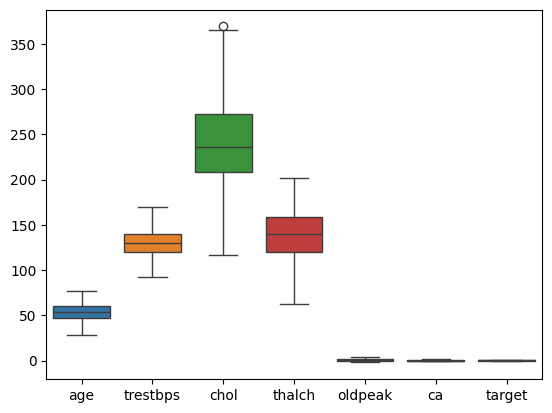

In [541]:
sns.boxplot(data=df_numeric);

In [542]:
df_numeric.describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,841.000000,782.000000,649.000000,787.000000,780.000000,272.000000,841.000000
mean,53.224732,130.430946,240.602465,138.044473,0.812949,0.511029,0.538644
std,9.469910,16.281053,46.525438,25.950958,0.993224,0.723784,0.498801
min,28.000000,92.000000,117.000000,63.000000,-2.000000,0.000000,0.000000
25%,47.000000,120.000000,208.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,236.000000,140.000000,0.400000,0.000000,1.000000
75%,60.000000,140.000000,272.000000,159.000000,1.500000,1.000000,1.000000
max,77.000000,170.000000,369.000000,202.000000,3.700000,2.000000,1.000000


In [543]:
df_numeric.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'], dtype='object')

In [544]:
# from sklearn.impute import KNNImputer

# # Tạo đối tượng KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=5)  # n_neighbors: số lượng hàng lân cận

# # Áp dụng KNN Imputer để điền dữ liệu
# df_numeric= knn_imputer.fit_transform(df_numeric)
# df_numeric = pd.DataFrame(df_numeric, columns=['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'])
# df_numeric

In [545]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Khởi tạo MICE imputer
imputer = IterativeImputer(max_iter=20, random_state=0)
df_numeric = imputer.fit_transform(df_numeric)
df_numeric = pd.DataFrame(df_numeric, columns=['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target'])
df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63.0,145.000000,233.0,150.000000,2.300000,0.000000,0.0
1,67.0,120.000000,229.0,129.000000,2.600000,2.000000,1.0
2,37.0,130.000000,250.0,187.000000,3.500000,0.000000,0.0
3,41.0,130.000000,204.0,172.000000,1.400000,0.000000,0.0
4,56.0,120.000000,236.0,178.000000,0.800000,0.000000,0.0
...,...,...,...,...,...,...,...
836,46.0,134.000000,310.0,126.000000,0.000000,0.480472,1.0
837,54.0,127.000000,333.0,154.000000,0.000000,0.793401,1.0
838,62.0,133.398209,139.0,137.286679,0.630631,0.425067,0.0
839,55.0,122.000000,223.0,100.000000,0.000000,0.694847,1.0


In [546]:
df_numeric.isna().sum()

age         0
trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
target      0
dtype: int64

In [547]:
round(df_numeric[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']])

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63.0,145.0,233.0,150.0,2.0,0.0,0.0
1,67.0,120.0,229.0,129.0,3.0,2.0,1.0
2,37.0,130.0,250.0,187.0,4.0,0.0,0.0
3,41.0,130.0,204.0,172.0,1.0,0.0,0.0
4,56.0,120.0,236.0,178.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
836,46.0,134.0,310.0,126.0,0.0,0.0,1.0
837,54.0,127.0,333.0,154.0,0.0,1.0,1.0
838,62.0,133.0,139.0,137.0,1.0,0.0,0.0
839,55.0,122.0,223.0,100.0,0.0,1.0,1.0


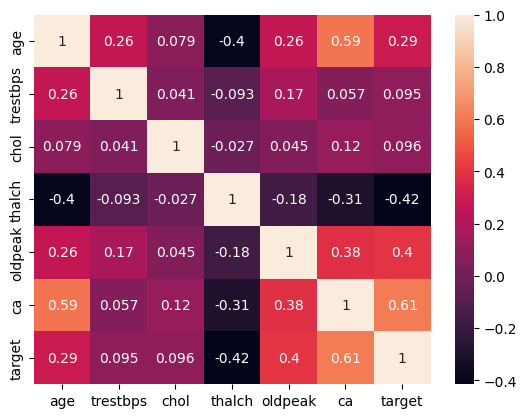

In [548]:
sns.heatmap(df_numeric.corr(), annot=True);

### Categories 

In [549]:
df_categories = df_heart[categories_col]
df_categories.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [550]:
df_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      920 non-null    object
 1   cp       920 non-null    object
 2   fbs      830 non-null    object
 3   restecg  918 non-null    object
 4   exang    865 non-null    object
 5   slope    611 non-null    object
 6   thal     434 non-null    object
dtypes: object(7)
memory usage: 50.4+ KB


In [551]:
df_categories.describe()

,sex,cp,fbs,restecg,exang,slope,thal
count,920,920,830,918,865,611,434
unique,2,4,2,3,2,3,3
top,Male,asymptomatic,False,normal,False,flat,normal
freq,726,496,692,551,528,345,196


In [552]:
df_categories.isna().sum()


sex          0
cp           0
fbs         90
restecg      2
exang       55
slope      309
thal       486
dtype: int64

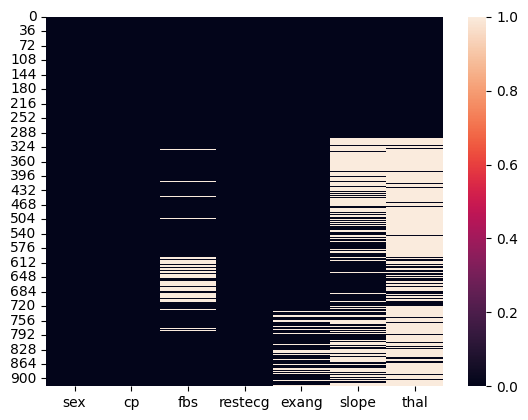

In [553]:
sns.heatmap(df_categories.isna());

In [554]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Tạo bản sao của dữ liệu để xử lý
categorical_data = df_categories.copy()

# Áp dụng Label Encoding tạm thời cho các cột categorical
label_encoders = {}
for col in df_categories.columns:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col].astype(str))
    label_encoders[col] = le  # Lưu lại encoder để dùng sau

# Sử dụng KNN Imputer để điền NaN
knn_imputer = KNNImputer(n_neighbors=5)
categorical_data_imputed = knn_imputer.fit_transform(categorical_data)

# Chuyển kết quả về DataFrame
categorical_data_filled = pd.DataFrame(categorical_data_imputed, columns=df_categories.columns)

# Chuyển các giá trị về kiểu int (do KNNImputer trả về kiểu float)
categorical_data_filled = categorical_data_filled.round().astype(int)
categorical_data_filled

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,0
1,1,0,0,0,1,1,2
2,1,0,0,0,1,1,3
3,1,2,0,2,0,0,2
4,0,1,0,0,0,3,2
...,...,...,...,...,...,...,...
915,0,0,1,3,0,2,1
916,1,3,0,3,2,2,1
917,1,0,1,3,0,2,0
918,1,0,1,0,2,2,1


In [555]:
# df_categories = pd.get_dummies(df_categories, columns=df_categories.columns, drop_first=True).astype(int)
# df_categories.isna().sum()

## Mức độ dễ (3 câu hỏi)


### Câu hỏi 1: Bao nhiêu phần trăm bệnh nhân trong dữ liệu được chẩn đoán mắc bệnh tim (target = 1)?
- Mục đích: Hiểu tỷ lệ mắc bệnh tim trong tập dữ liệu.

In [556]:
# Phan tram benh nhan mac benh
mac_benh =(len(df_numeric[df_numeric['target']==1])/len(df_numeric))*100
print(f'Ti le mac benh la {mac_benh:.2f}%')

Ti le mac benh la 53.86%


### Câu hỏi 2: Tỷ lệ giữa nam (Male) và nữ (Female) trong dữ liệu là bao nhiêu?
- Mục đích: Phân bố giới tính của bệnh nhân trong tập dữ liệu.

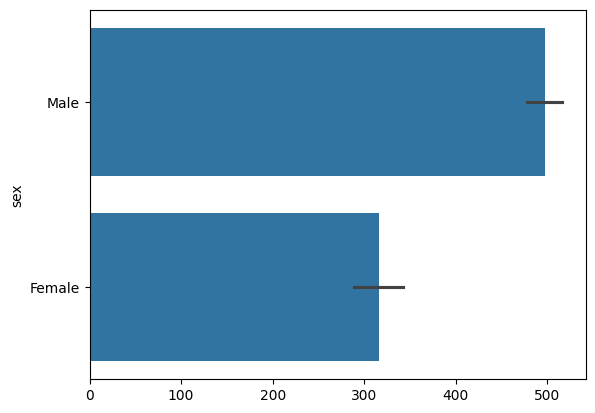

In [557]:
# Ty le nam nu
sns.barplot(data=df_categories['sex']);

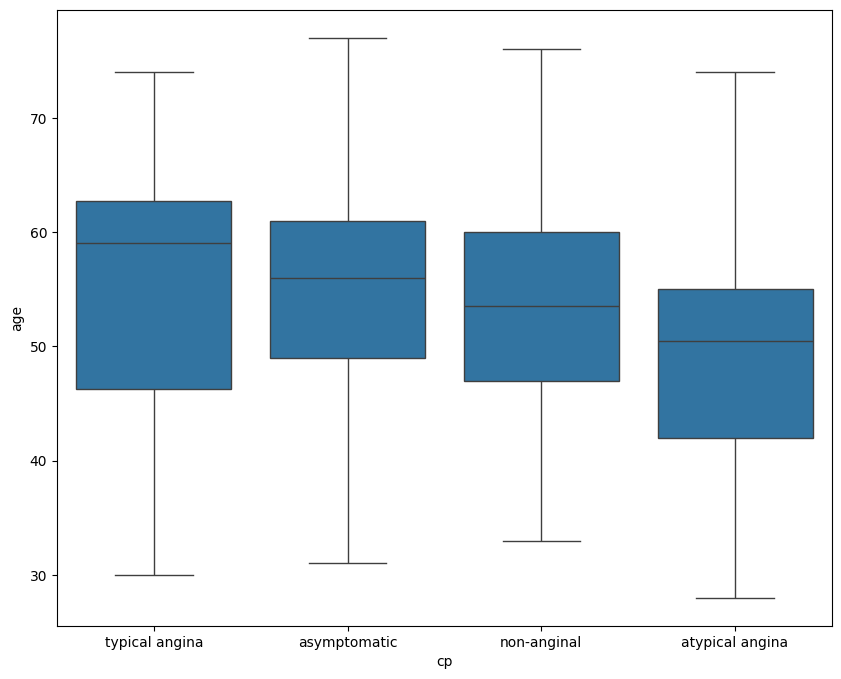

In [558]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_heart, x='cp', y='age');

### Câu hỏi 3: Độ tuổi trung bình của bệnh nhân trong dữ liệu là bao nhiêu?
- Mục đích: Hiểu nhóm tuổi phổ biến trong tập dữ liệu.

In [559]:
df_heart['age'].mean()

53.51086956521739

## Mức độ trung bình (4 câu hỏi)


### Câu hỏi 4: Có sự khác biệt nào về tỷ lệ mắc bệnh tim (target) giữa nam và nữ không?
- Mục đích: Tìm hiểu sự liên quan giữa giới tính và khả năng mắc bệnh tim.

In [560]:
# Tính tỷ lệ mắc bệnh tim theo giới tính
gender_target = df_heart.groupby('sex')['target'].value_counts()
print(gender_target)



sex     target
Female  0         144
        1          50
Male    1         459
        0         267
Name: count, dtype: int64


In [561]:
male = df_heart[df_heart['sex']=='Male']
male_target = df_heart[(df_heart['sex']=='Male')&(df_heart['target']==1)]
male_percent = len(male_target)/len(male)*100
print(f'Phan tram mac benh o nam la: {male_percent:.2f}%')


female = df_heart[df_heart['sex']=='Female']
female_target = df_heart[(df_heart['sex']=='Female')&(df_heart['target']==1)]
female_percent = len(female_target)/len(female)*100
print(f'Phan tram mac benh o nam la: {female_percent:.2f}%')

Phan tram mac benh o nam la: 63.22%
Phan tram mac benh o nam la: 25.77%


### Câu hỏi 5: Nhóm đau ngực nào (cp) phổ biến nhất ở những bệnh nhân không mắc bệnh tim (target = 0)?
- Mục đích: Phân tích kiểu đau ngực ở nhóm không mắc bệnh.

In [562]:
cp_target_0=df_heart['cp'][df_heart['target']==0].value_counts()
cp_target_0

cp
atypical angina    150
non-anginal        131
asymptomatic       104
typical angina      26
Name: count, dtype: int64

In [563]:
df_cp_target_0 = cp_target_0.reset_index()
# Đổi tên các cột cho dễ hiểu
df_cp_target_0.columns = ['cp', 'values']
df_cp_target_0.head()

,cp,values
0,atypical angina,150
1,non-anginal,131
2,asymptomatic,104
3,typical angina,26


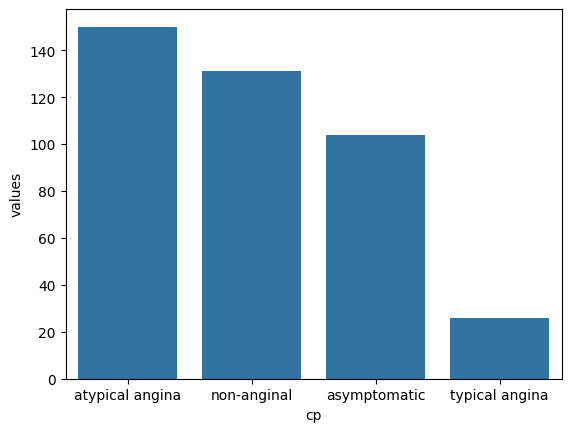

In [564]:
sns.barplot(df_cp_target_0, x='cp', y='values');

### Câu hỏi 6: Huyết áp nghỉ (trestbps) trung bình của bệnh nhân mắc bệnh tim so với bệnh nhân không mắc bệnh có khác biệt không?
- Mục đích: Xem xét mối liên hệ giữa huyết áp và bệnh tim.

In [565]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
print(f'''Huyet ap luc nghi cua nguoi mac benh {trestbps_target_1}\n
Huyet ap luc nghi cua nguoi ko mac benh {trestbps_target_2}''')

Huyet ap luc nghi cua nguoi mac benh trestbps    133.978723
dtype: float64

Huyet ap luc nghi cua nguoi ko mac benh trestbps    129.913043
dtype: float64


In [566]:
trestbps_target_1 = df_heart[['trestbps']][df_heart['target']==1].mean()
df_trestbps_target_1 = trestbps_target_1.reset_index()
df_trestbps_target_1.columns=['index', 'values']
df_trestbps_target_1

,index,values
0,trestbps,133.978723


In [567]:
trestbps_target_2 = df_heart[['trestbps']][df_heart['target']==0].mean()
df_trestbps_target_2 = trestbps_target_2.reset_index()
df_trestbps_target_2.columns=['index', 'values']
df_trestbps_target_2

,index,values
0,trestbps,129.913043


In [568]:
df_merge_trestpbs = pd.merge(df_trestbps_target_1, df_trestbps_target_2, how='inner', on=['index'])
df_merge_trestpbs

,index,values_x,values_y
0,trestbps,133.978723,129.913043


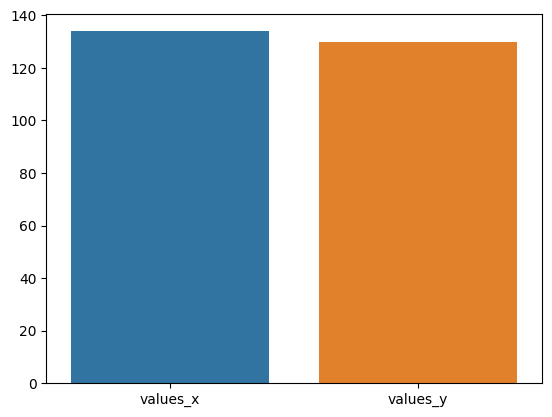

In [569]:
sns.barplot(data=df_merge_trestpbs);

### Câu hỏi 7: Nhóm bệnh nhân có giá trị cholesterol (chol) trung bình cao hơn hay thấp hơn những người không mắc bệnh tim?
- Mục đích: Đánh giá mối quan hệ giữa nồng độ cholesterol và bệnh tim.

In [570]:
chol_targer_1 = df_heart['chol'][df_heart['target']==1].mean()
chol_target_0 = df_heart['chol'][df_heart['target']==0].mean()
print(chol_target_0, chol_targer_1)

227.90561224489795 176.47991967871485


In [571]:
df_chol_target_1 = df_heart[df_heart['target']==1]
df_chol_target_1.describe(include='all')

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,509.000000,509.000000,509,509,470.000000,498.000000,433,507,474.000000,474,468.000000,393,144.000000,247,509.0
unique,NaN,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,asymptomatic,NaN,NaN,False,normal,NaN,True,NaN,flat,NaN,reversable defect,NaN
freq,NaN,NaN,459,392,NaN,NaN,339,283,NaN,282,NaN,266,NaN,154,NaN
mean,545.479371,55.903733,NaN,NaN,133.978723,176.479920,NaN,NaN,128.261603,NaN,1.262607,NaN,1.131944,NaN,1.0
std,264.886869,8.718959,NaN,NaN,20.552278,127.517611,NaN,NaN,24.024193,NaN,1.197424,NaN,1.012140,NaN,0.0
min,2.000000,31.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,1.0
25%,286.000000,51.000000,NaN,NaN,120.000000,0.000000,NaN,NaN,112.000000,NaN,0.000000,NaN,0.000000,NaN,1.0
50%,608.000000,57.000000,NaN,NaN,130.000000,218.000000,NaN,NaN,128.000000,NaN,1.050000,NaN,1.000000,NaN,1.0
75%,751.000000,62.000000,NaN,NaN,145.000000,267.750000,NaN,NaN,145.000000,NaN,2.000000,NaN,2.000000,NaN,1.0


In [572]:
df_chol_target_0 = df_heart[df_heart['target']==0]
df_chol_target_0.describe(include='all')

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,411.000000,411.000000,411,411,391.000000,392.000000,397,411,391.000000,391,390.000000,218,165.000000,187,411.0
unique,NaN,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,atypical angina,NaN,NaN,False,normal,NaN,False,NaN,upsloping,NaN,normal,NaN
freq,NaN,NaN,267,150,NaN,NaN,353,268,NaN,336,NaN,125,NaN,138,NaN
mean,355.257908,50.547445,NaN,NaN,129.913043,227.905612,NaN,NaN,148.800512,NaN,0.418205,NaN,0.278788,NaN,0.0
std,226.418610,9.433700,NaN,NaN,16.869867,75.832760,NaN,NaN,23.608692,NaN,0.715636,NaN,0.640006,NaN,0.0
min,1.000000,28.000000,NaN,NaN,80.000000,0.000000,NaN,NaN,69.000000,NaN,-1.100000,NaN,0.000000,NaN,0.0
25%,186.500000,43.000000,NaN,NaN,120.000000,199.000000,NaN,NaN,134.500000,NaN,0.000000,NaN,0.000000,NaN,0.0
50%,345.000000,51.000000,NaN,NaN,130.000000,228.000000,NaN,NaN,151.000000,NaN,0.000000,NaN,0.000000,NaN,0.0
75%,447.500000,57.000000,NaN,NaN,140.000000,269.000000,NaN,NaN,167.500000,NaN,0.800000,NaN,0.000000,NaN,0.0


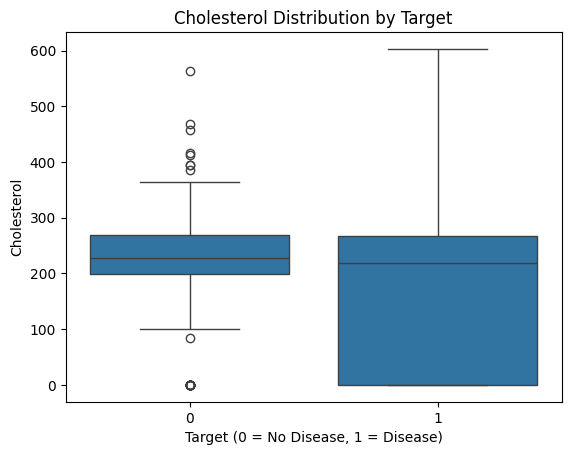

In [573]:
sns.boxplot(data=df_heart, x='target', y='chol')
plt.title('Cholesterol Distribution by Target')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Cholesterol');

In [574]:
df_chol_target_0[df_chol_target_0[['chol']].isna().any(axis=1)]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
305,306,29,Male,atypical angina,140.0,NaN,False,normal,170.0,False,0.0,NaN,NaN,NaN,0
334,335,39,Male,atypical angina,120.0,NaN,False,st-t abnormality,146.0,False,2.0,upsloping,NaN,NaN,0
337,338,39,Male,atypical angina,130.0,NaN,False,normal,120.0,False,0.0,NaN,NaN,NaN,0
347,348,40,Male,non-anginal,140.0,NaN,False,normal,188.0,False,0.0,NaN,NaN,NaN,0
368,369,43,Female,non-anginal,150.0,NaN,False,normal,175.0,False,0.0,NaN,NaN,normal,0
375,376,45,Female,atypical angina,180.0,NaN,False,normal,180.0,False,0.0,NaN,NaN,NaN,0
378,379,45,Male,non-anginal,135.0,NaN,False,normal,110.0,False,0.0,NaN,NaN,NaN,0
389,390,47,Female,non-anginal,130.0,NaN,False,normal,145.0,False,2.0,flat,NaN,NaN,0
394,395,48,Female,atypical angina,120.0,NaN,True,st-t abnormality,148.0,False,0.0,NaN,NaN,NaN,0
400,401,48,Male,atypical angina,100.0,NaN,False,normal,100.0,False,0.0,NaN,NaN,NaN,0


In [575]:
df_chol_target_0 = df_chol_target_0.dropna(subset='chol')
df_chol_target_0

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
7,8,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,905,57,Male,asymptomatic,130.0,207.0,False,st-t abnormality,96.0,True,1.0,flat,NaN,NaN,0
909,910,68,Male,non-anginal,134.0,254.0,True,normal,151.0,True,0.0,NaN,NaN,normal,0
910,911,51,Female,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
916,917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0


In [576]:
lower = bound(df_chol_target_0['chol'])[0]
upper = bound(df_chol_target_0['chol'])[1]
lower, upper

(94.0, 374.0)

In [577]:
# Loai bo outliners
df_chol_target_0

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
7,8,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904,905,57,Male,asymptomatic,130.0,207.0,False,st-t abnormality,96.0,True,1.0,flat,NaN,NaN,0
909,910,68,Male,non-anginal,134.0,254.0,True,normal,151.0,True,0.0,NaN,NaN,normal,0
910,911,51,Female,asymptomatic,114.0,258.0,True,lv hypertrophy,96.0,False,1.0,upsloping,NaN,NaN,0
916,917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
